In [409]:
%run kmeans

#  Overview
+ K-Means
    - Basic explanation
    - Clustering vs Classification
    - Application to
        - one dimensional data
        - two dimensional data
        - disjoint and nested structures
+ K-Means++
    - Basic explanation
    - Application to image compression
        - Greyscale
        - color
+ Spectral clustering
    - Nearest neighbors
    - using RFs to compute similarity matrices

# 1. K-Means

## 1.1 Basic explanation
### How does K-Means work?
The goal of K-means clustering is to partition data into k clusters. The data points within the same cluster are similar, and the data points in the different clusters are farther apart.  
But how do we define the similarity of two points? We measure the distance between them. There are multiple ways of measuring the distance between two points. One of the most common distance measurement is Euclidean distance. 
$$ Euclidean\ distance(x, y) =  \sqrt{ (x_{1}-y_{1})^2 +  (x_{2}-y_{2})^2}$$ 
So K-means clustering tries to minimize distances within a cluster and maximize the distance between different clusters.
### k-Means Algorithm Steps
+ Start:
    1. User provide X and number of clusters k
        - Note that K-means algorithm is not capable of determining the number of clusters. There are methods to choose number of clusters(eg. The Elbow Method).
    1. Select k points as initial centroids
        - Randomly select k unique centroids. For large dimension of space, this seems to not work well.
        - Pick k distant ponits. K-means++, which I will talk in the second part, is the variation for initial selection.
+ Repeat:
    1. Assign all points to the cluster with closet centroid
    1. Recompute all the centroids
+ Stop when clusters stop changing or reach the maximum amount of iteration defined by users

## 1.2 Clustering vs Classification
+ Classification is supervised learning. Each data point has a known class. Classification algorithms try to catch the relationship between features and their assigned class. 
+ Clustering is unsupervised learning. There is no known label. Clustering algorithms try to group similar data points into the same clusters. 

## 1.3 Application of K-Means

I implemented kmeans algorithm from scratch. 
It take 5 parameters as input: 
+ __X__: Data to be clustered. It should be  a 2 dimensional numpy array. 
+ __k__: The number of clusters. 
+ __centroids__: 
    - default value is None, which indicates this algorithm should randomly pick  k unique centroids.
    - If centroids='kmeans++',  then this algorithm should use the kmeans++ mechanism for selecting initial centroid, which will be described in the second part of this report.
+ __max_iter__: the maximum amount of iteration. Default value is None.
+ __tolerance__: a general guideline for comparing previous and next generation centroids. If the average norm of centroids-previous_centroids is less than the tolerance, the algorithm will stop. Default value is 1e-2.

The output of this algorithm are centroids and labels. 
+ __centroids__: a 2 dimensional numpy array indicating an k x p matrix containing the k centroids (vectors are p long). 
+ __labels__: a list of length n the label associated with each input vector.

Now let's run this algorithm using 
+ one dimensional data
+ two dimensional data 
    - which we can obviously see different clusters by eyes
    - which has disjoint and nested structures

### 1.3.1 run on one dimensional data using some fake grade data

In [112]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86,
          85.94, 91.79, 95.23, 85.37, 87.85, 97.71, 93.03]
k = 3

grades = np.array(grades).reshape(-1, 1)

centroids, labels = kmeans(grades, k)
print('centroids: ', centroids.reshape(1, -1))
print('labels for each x: ', labels)
for j in range(k):
    print("vector assignments: ", grades[labels==j].reshape(1, -1))

centroids:  [[93.68 74.06 85.35]]
labels for each x:  [0 0 1 2 0 0 0 2 0 2 0 0 2 2 0 0]
vector assignments:  [[92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 97.71 93.03]]
vector assignments:  [[74.06]]
vector assignments:  [[86.94 80.65 85.94 85.37 87.85]]


From the output, we can see it returns a two-dimensional array containing 3 centroids and an array of labels.   
How do we assign each data point to its cluster? We replace each data point with its centroid points. If we want to present data in its original order, we can just use centroids[labels]. Or use a loop as shown above, from which we can see each present each cluster and the data within it. 

### 1.3.2 run on two dimensional data
Let’s try with two-dimensional data! The good thing about using two-dimensional data is that we can see how our kmeans algorithm works by looking at the plots together with the original data on it. 

In [219]:
import matplotlib.pyplot as plt
palette = "Dark2"
%matplotlib inline

# Load data
X = np.load("bivariate_unlabeled_data.npy")
# The data is unlabeled bivariate float data
X

array([[-2.76250926, -2.76172401],
       [-2.16912174, -2.24039764],
       [-2.55025615, -3.15886029],
       ...,
       [-1.37885223, -1.03674544],
       [-2.13757758, -0.13285992],
       [-0.49470988,  0.07855605]])

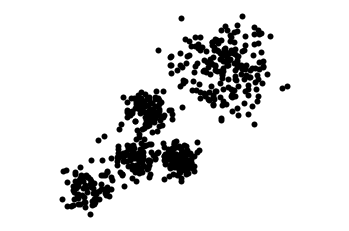

In [220]:
plt.scatter(X[:,0], X[:,1], linewidths=0, color='k')
plt.axis('off');plt.axis('equal');

There is definitely more than one cluster! But what will be the optimal number of clusters? One of the ways is to use Elbow method.   
+ Compute clustering algorithm for different values of k. 
+ For each k, calculate the total within-cluster sum of square(wss).
+ Plot the curve of wss according to the number of clusters k.
+ The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

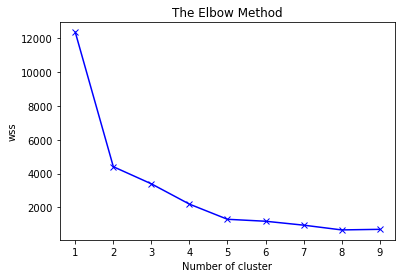

In [188]:
K = range(1, 10)
inertia = elbow_method(X, K)

plt.plot(K, inertia, 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel('wss')
plt.title('The Elbow Method')
plt.show()

Two appropriate numbers of clusters for this data are 2 and 5. Let's first try with 2.

[[-1.21806108 -2.6089082 ]
 [ 3.98907715  2.99678068]]


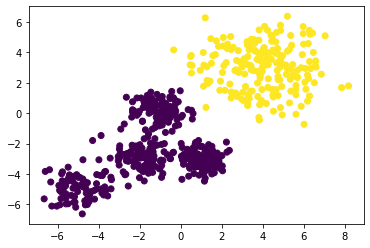

In [191]:
centroids, labels = kmeans(X, k=2, tolerance=0.01, centroids=None)
print(centroids)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

Then try with 5.

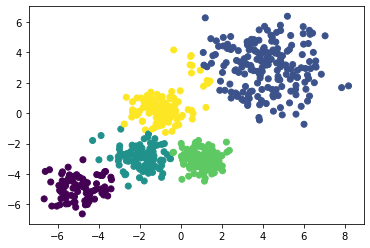

In [227]:
centroids, labels = kmeans(X, k=5, tolerance=0.01, centroids=None)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

Looks great! Next I want to see how kmeans performs on data with disjoint and nested structures.

### 1.3.3 run on disjoint and nested structures

[[-0.35606846  0.29669637]
 [ 0.25004398 -0.22166286]]


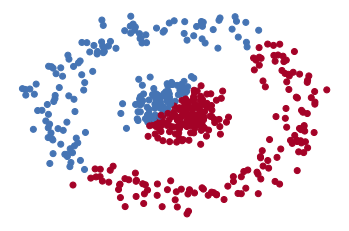

In [8]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2)
print(centroids)
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[list(labels)])
plt.axis('off')
plt.show()

As you can see, kmeans performs poorly on disjoint and nested structures. A more advanced approach will be talked in the third part.

# 2. K-Means++

## 2.1 Basic explanation
### How does K-Means++ work?
Rather than randomly initialize centroids like K-Means, K-Means++ use a smart centroid initialization techique. 

### k-Means Algorithm Steps
+ Pick the first centroid point randomly.
+ Compute distance of all points in the dataset from the selected centroid. Select the point that maximize the minimum distance to the existing cluster.
+ Repeat the above one step utill you find k-centroids.

## 2.2 Application of K-Means++

### 2.2.1 run on two-dimensional data
Let's try on the cancer data set which has 30 features.

In [209]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # y=0 means cancer, y=1 means benign

print('count of actual cancer:', np.sum(y == 0))
print('count of actual benigh:', np.sum(y == 1))

count of actual cancer: 212
count of actual benigh: 357


In [210]:
# Make sure to scale so that distances mean the same in all dimensions
sc = StandardScaler()
X = sc.fit_transform(X)

centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)
likely_confusion_matrix(y, labels)

act\pred | class-0  class-1
---------------------------
class-0  |     175       37
class-1  |      13      344

Clustering accuracy:  0.9121265377855887


This dataset includes labels. But we don't have the y target to work with during clustering. How do we know which centroid is associated with which true label? We can see the counts of the two labels are different. So do the number of points within the two clusters. So what I do is check if the number of points within the first cluster is closer to the counts of label 0 or to the counts of label 0. Then flip each element in that cluster to the appropriate label. Then, we can compare those results to the known y.

# 3. Application to image compression

Let's look at the application of clustering to image compression. Rather than use millions of colors, we can usually get away with 256 or even 64 colors. The key is choosing the right colors that are representative for that image.  

Before digging into the actual code, let’s walk through the steps of implementation:
+ 1. Image Input: Load the image from disk.
+ 2. Reshape the input image. Note that the way of reshaping greyscale image and color image is different. 
    - For greyscale image, the size of the input image is (rows, cols), flatten all the pixel value to a single dimension of size (rows * cols) and the dimension of each pixel is only 1. The size of the flatten image will be (rows * cols, 1).
    - For color image, the size of the input image is (rows, cols, 3), flatten all the pixel value to a single dimension of size (rows * cols) and the dimension of each pixel is 3 representing RGB values. The size of the flatten image will be (rows * cols, 3).
+ 3. Clustering: Implement the kMeans++ clustering algorithm to find k-centroid points that represent its surrounding color combination.
+ 4. Replace each pixel with its centroid points: All the color combination of (rows*cols) number of pixels is now represented by its centroid points. Replace the value of each of the pixels with its centroid point. 
+ 5. Reshape Compressed Image. Again note that the way of reshaping greyscale image and color image is different. 
    - For greyscale image, reshape the compressed image of (rows*cols, 1) dimensions to original (rows, cols) dimensions.
    - For color image, reshape the compressed image of (rows*cols, 3) dimensions to original (rows, cols, 3) dimensions.
+ 6. Output Compressed Image: Display the output image and store it to disk.

## 3.1 Greyscale

In [10]:
import time
from skimage import io

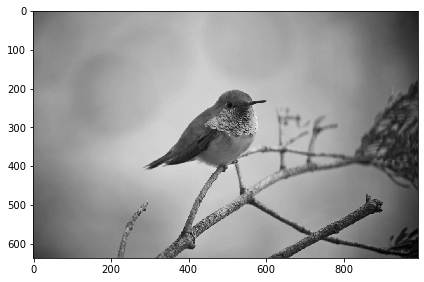

time:  141.10988187789917 s


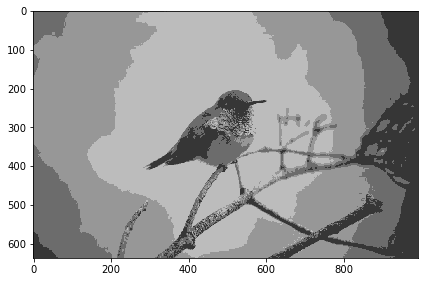

In [98]:
t0 = time.time()

# show original image
image = io.imread('bird.png')
io.imshow(image)
io.show()
h,w = image.shape

# flatten the image
image = image.reshape(-1,1)

#Implement kmeans++ clustering to form k clusters
centroids, labels = kmeans(image, k=4, centroids='kmeans++')
centroids = centroids.flatten().astype(np.uint8)

# reassign all points
X = centroids[labels] 

# Reshape and Output Compressed Image
io.imshow(X.reshape(h,w))
t1 = time.time()
print('time: ', t1 - t0, 's')

## 3.2 Color

Now move to color pictures. For greyscale images, each pixel in the image has only one byte, whereas each pixel in a color image has Red/Green/Blue colors, which means each pixel has 3 bytes. So the application of clustering to color compression is to cluster in p=3 space for (red, green, blue) vectors.

Let's start with a picture of a giraffe in the Animal Kingdom: 

initial size of the image:  (684, 1024, 3)
shape of image_array:  (700416, 3)


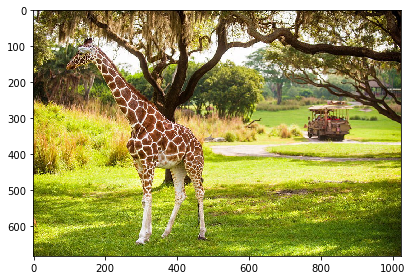

In [88]:
# Image Input 
giraffe = io.imread('giraffe.jpeg')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
giraffe = np.array(giraffe, dtype=np.float64) / 255
io.imshow(giraffe);

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(giraffe.shape)
print('initial size of the image: ', (w, h, d))
assert d == 3

# Reshape Input Image 
image_array = np.reshape(giraffe, (w * h, d))
print('shape of image_array: ', image_array.shape)

The initial dimension of this image is 684*1024 pixels. Each pixel has 3-dimension representing RGB intensity values. The RGB intensity values range from 0 to 255. We divide each RGB intensity value by 255, so each value will be range from 0 to 1.

Let's get a compressed version that uses only 25 colors using kmeans++: 

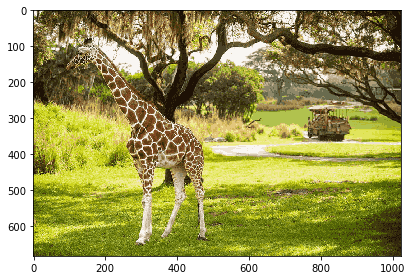

In [89]:
# Implement k-means clustering to form k clusters
n_colors = 32
centroids, labels = kmeans(image_array, k=n_colors, centroids='kmeans++')

# Replace each pixel with its centroid points 
X = centroids[labels]

# Reshape and Output Compressed Image
io.imshow(X.reshape((w, h, 3)));

Looks great! But I want to put the original image and the compressed version side by side to have better contrast. I created a function to generate the compressed version by taking centroids, labels of running my kmean++, together with the shape of the original image as input. 

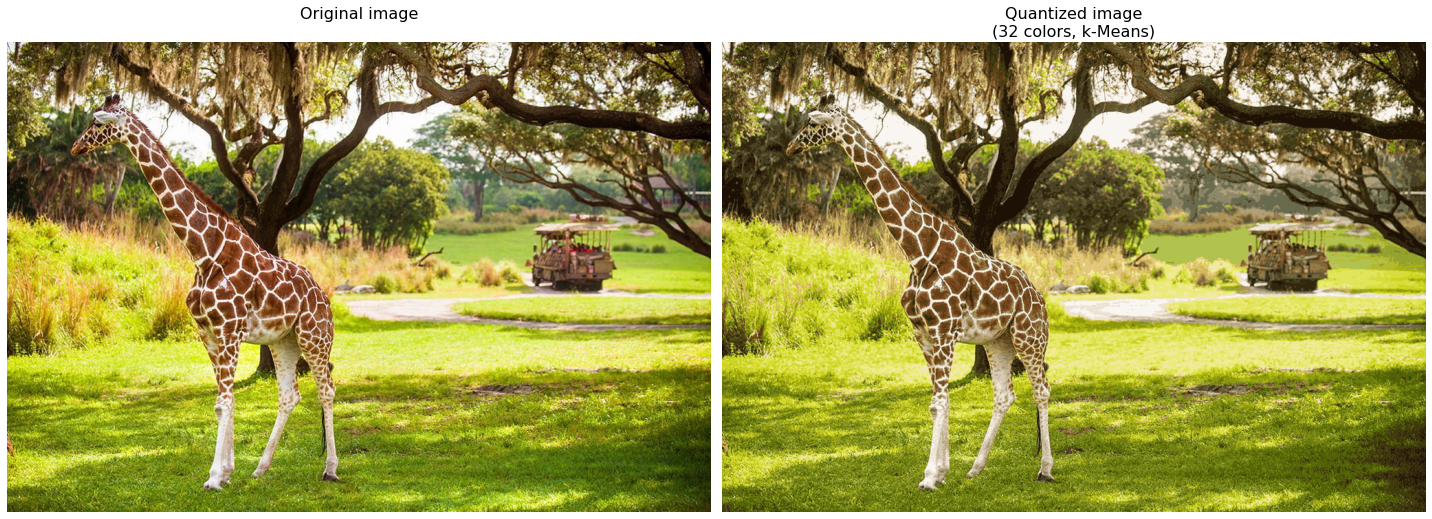

In [91]:
# Display all results, alongside original image
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].axis('off')
axes[0].set_title(f'Original image\n', fontsize=16)
axes[0].imshow(giraffe)

axes[1].axis('off')
axes[1].set_title(f'Quantized image\n({n_colors} colors, k-Means)', fontsize=16)
axes[1].imshow(X.reshape((w, h, 3)))

plt.tight_layout()
plt.show()

We can see that kmeans++ does a good job on color compression. Let's try a more colorful one, but this time wrap all code together in a single block!

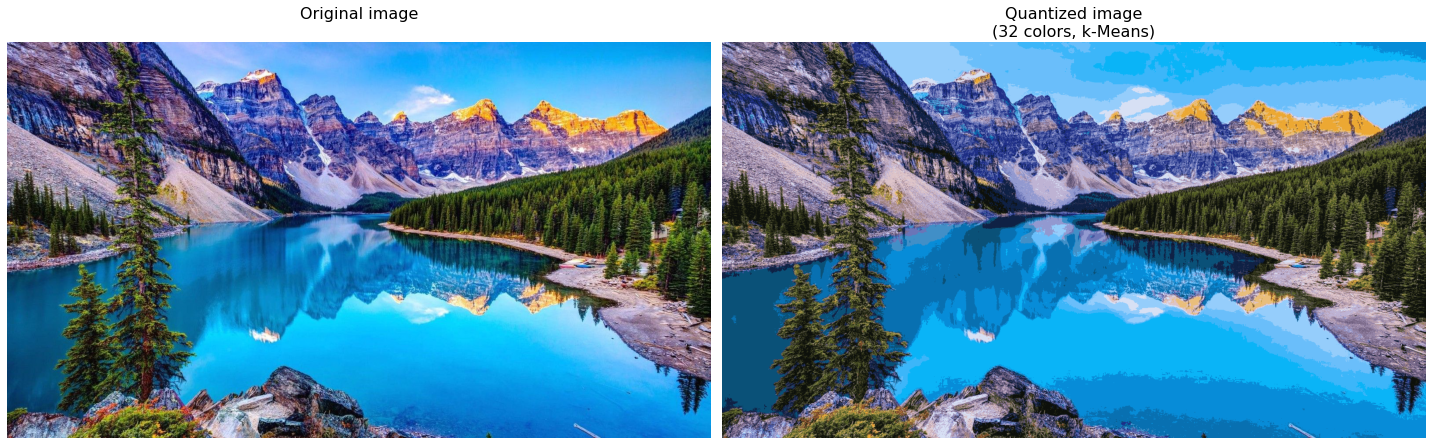

In [103]:
color = io.imread('wallpaper.jpg')
color = np.array(color, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(color.shape)
color_image_array = np.reshape(color, (w * h, d))

# Implement k-means clustering to form k clusters
n_colors = 32
centroids, labels = kmeans(color_image_array, k=n_colors, centroids='kmeans++')

# Replace each pixel with its centroid points 
X = centroids[labels]
X_reshape = X.reshape((w, h, d))

# Output compressed image, alongside original image
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].axis('off')
axes[0].set_title(f'Original image\n', fontsize=16)
axes[0].imshow(color)

axes[1].axis('off')
axes[1].set_title(f'Quantized image\n({n_colors} colors, k-Means)', fontsize=16)
axes[1].imshow(X_reshape)

plt.tight_layout()
plt.show()

# 3. Spectral clustering


We see from the first part that K-Means wasn’t going to work for data with disjoint and nested structures. It assumes euclidean space and thus operates on euclidean distance, and it assumes that the clusters are roughly spherical. The data with disjoint and nested structures breaks these assumptions. Let’s try to tackle this with spectral clustering.

## 3.1 nearest neighbors

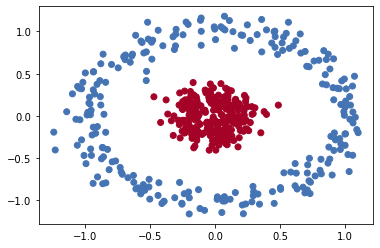

In [215]:
from sklearn.cluster import SpectralClustering

X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)

cluster = SpectralClustering(n_clusters=2, 
                             affinity='nearest_neighbors')
labels = cluster.fit_predict(X)  # pass X not similarity matrix
colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()

That example uses a built-in mechanism called "nearest neighbors" to compute the distance between all pairs of records. It treats every data point as a node in a graph. An edge is then drawn from each node to its k nearest neighbors in the original space.

## 3.2 using RFs to compute similarity matrices

Random forests can be used in an unsupervised way to get a similarity or distance metric from observation __i__ to observation __j__. By digging into Breiman’s RF clustering, I use Breiman’s trick to compute similarity matrices using random forest from scratch. 
The steps of computing similarity matrices using random forest are:
+ Consider all X records as class 0
+ Duplicate and bootstrap columns of X to get X’
+ Create y to label/distinguish X vs X’
+ Train RF on stacked [X, X’] -> y
+ Walk all leaves of all trees, bumping proximity[__*i*__, __*j*__] for all $x_{i}$, $x_{j}$ pairs in leaf; divide proximities by the number of leaves.  

After we get the similarity matrix, we pass it to SpectralClustering. 

In [410]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # y=0 means cancer, y=1 means benign

S = similarity_matrix(X) # breiman's trick
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
labels = cluster.fit_predict(S) # pass similarity matrix not X

likely_confusion_matrix(y, labels)

act\pred | class-0  class-1
---------------------------
class-0  |     193       19
class-1  |      37      320

Clustering accuracy:  0.9015817223198594
